# Arbol de deseción para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape    

(150, 5)

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

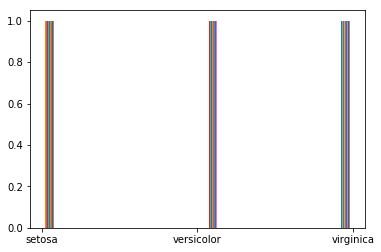

In [4]:
plt.hist(data.Species)

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [7]:
data["is_train_tmp"] =np.random.uniform(0,1, len(data))
data["is_train"] = [1 if i <= 0.75 else 0 for i in data.is_train_tmp]


In [8]:
data.is_train[0:5]

0    0
1    1
2    1
3    1
4    1
Name: is_train, dtype: int64

(array([ 33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 117.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

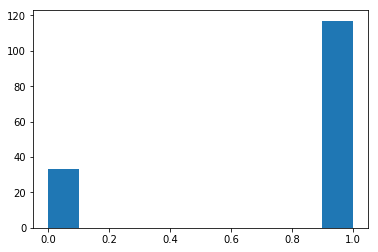

In [9]:
plt.hist(data.is_train)

In [10]:
train, test= data[data["is_train"]== 1], data[data["is_train"]== 0]
test.shape

(33, 7)

In [11]:
## min_samples_split: Es la opcion para evitar que se generen tantos subarboles como elementos del dataset y prevenir overrsitt
# por default es 2 pero tampoco es una subclasificacion que a primera impresion funcion bien
## min_samples_leaf: Establece cuantos nodos hoja deben estar en el ultimo subarbol
# esto para prevenir subconjuntos de 1 solo nodo
tree = DecisionTreeClassifier(criterion = "entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [12]:
preds = tree.predict(test[predictors])

In [13]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,7,0,0
versicolor,0,11,1
virginica,0,0,14


* las 13 setosa estan bien clasificadas
* de las 8 versicolor el modelo clasifico 3 en virginica
* de las 12 en virginica clasifico 1 en setosa

In [14]:
preds[30:]

array(['virginica', 'virginica', 'virginica'], dtype=object)

In [15]:
test[:3]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train_tmp,is_train
0,5.1,3.5,1.4,0.2,setosa,0.913068,0
20,5.4,3.4,1.7,0.2,setosa,0.874407,0
21,5.1,3.7,1.5,0.4,setosa,0.903747,0


## Visualización del arbol de decisión

In [16]:
from sklearn.tree import export_graphviz

In [17]:
with open ("resources/iris_dtree.dot","w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [18]:
import os 
from graphviz import Source

In [19]:
file = open("resources/iris_dtree.dot","r")
text = file.read()

In [20]:
# Source(text)

### si la libreria no funciona muy bien, se puede hacer con la liga
http://www.webgraphviz.com/

En este grafico si es la longitud es mayor a 2.6 la hoja es setosa [35,0,0] si tiene dos ceros es claro que identifico bien si tiene dos valores y solo 1 cero no esta tan seguro de donde clasificarlo value = []

## Cross Validation para la poda

In [21]:
X = data[predictors]
Y = data[target]

In [22]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth=10, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [23]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
cv = KFold(n=X.shape[0],n_folds = 10, shuffle=True, random_state=1)

In [25]:
cross_score = cross_val_score(tree,X,Y,scoring="accuracy", cv=cv, n_jobs=1)
cross_score

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [26]:
score = np.mean(cross_score)
score

0.9333333333333333

In [27]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion = "entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cross_score = cross_val_score(tree,X,Y,scoring="accuracy", cv=cv, n_jobs=1)
    score = np.mean(cross_score)
    print("Score para i =",i," es de ",score)
    print("",tree.feature_importances_)


Score para i = 1  es de  0.5666666666666667
 [0. 0. 1. 0.]
Score para i = 2  es de  0.9200000000000002
 [0.         0.         0.66620285 0.33379715]
Score para i = 3  es de  0.9400000000000001
 [0.         0.         0.68976981 0.31023019]
Score para i = 4  es de  0.9333333333333333
 [0.         0.         0.66869158 0.33130842]
Score para i = 5  es de  0.9333333333333333
 [0.         0.         0.66869158 0.33130842]
Score para i = 6  es de  0.9333333333333333
 [0.         0.         0.66869158 0.33130842]
Score para i = 7  es de  0.9333333333333333
 [0.         0.         0.66869158 0.33130842]
Score para i = 8  es de  0.9333333333333333
 [0.         0.         0.66869158 0.33130842]
Score para i = 9  es de  0.9333333333333333
 [0.         0.         0.66869158 0.33130842]
Score para i = 10  es de  0.9333333333333333
 [0.         0.         0.66869158 0.33130842]


In [28]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Hicimos una validacion cruzada del abol y en el bucle obtenemos cuales son las variables predictoras importantes

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [43]:
# n_jobs = numero de hilos en el procesador
# obb_score = True va a hacer un muestreo automatico
# n_estimators = Numero de arboles
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators = 500)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [44]:
forest.oob_decision_function_[60:70] ## si es las predicciones aparecen "nan" subir el numero de arboles

array([[0.00540541, 0.95675676, 0.03783784],
       [0.        , 0.99453552, 0.00546448],
       [0.        , 0.96648045, 0.03351955],
       [0.        , 0.98901099, 0.01098901],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.92553191, 0.07446809],
       [0.        , 0.9939759 , 0.0060241 ]])

In [45]:
forest.oob_score_

0.9533333333333334

## Con la validacion cruzada llegamos a 94  con el bosque llegamos a 95.3 
Mejora la eficiencia de la prediccion usando el bosque